### **Author** : Sumeet Jadhav
### **Intern at The Sparks Foundation GRIP**
### **Domain** : Data Science & Business Analytics 
### **Task 3** : Perform Exploratory Data Analysis - Retail



In [37]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
data = pd.read_csv('E:\Python\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
data.shape   # here we can see the number of rows and columns in dataset using shape function

(9977, 12)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [41]:
data.duplicated().sum()

17

### Dropping 17 duplicate data entries.

In [42]:
data.drop_duplicates(inplace= True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


### Dropping unwanted columns

In [44]:
data.drop(["Postal Code"], axis=1,inplace= True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


### Correlation between the data

In [46]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

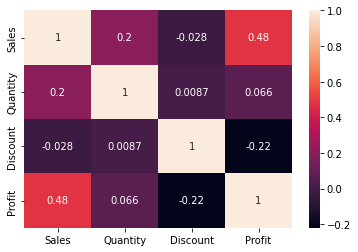

In [47]:
sns.heatmap(data.corr(), annot=True)  

### Analysing the different kinds of Shipping Modes, Segments and categories given in the data

In [48]:
data["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

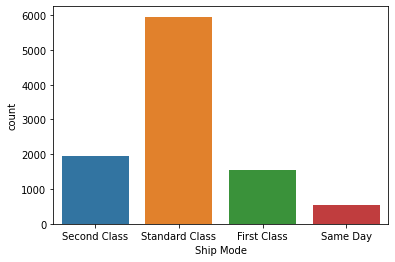

In [49]:
sns.countplot(x= data['Ship Mode'])

In [50]:
data["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

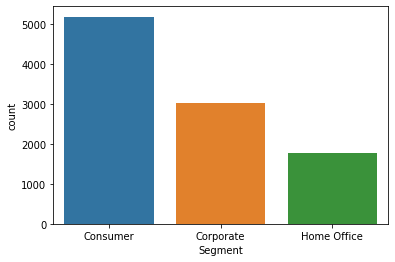

In [51]:
sns.countplot(x= data['Segment'])

In [52]:
data["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

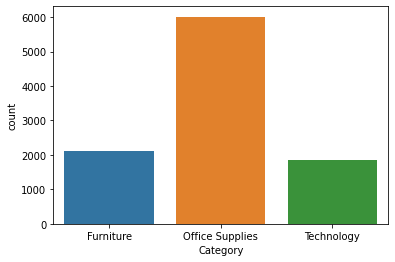

In [53]:
sns.countplot(x= data['Category'])

### From the above plot it can be concluded that Office Supplies Category has highest number of sales. Checking the sub-categories in the next step.


In [54]:
data["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

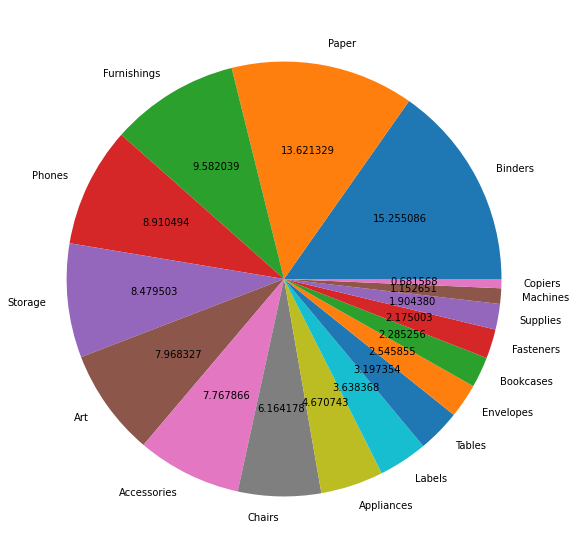

In [55]:
plt.figure(figsize=(10,10))
plt.pie(data["Sub-Category"].value_counts(), labels= data["Sub-Category"].value_counts().index, autopct ="%2f")
plt.show()

### Here, Sub-Category with highest sale is Binder, followed by Paper and Furnishings as second and third respectively.


In [56]:
st_profit=data.groupby(["State"])["Profit"].sum().nlargest(20)

In [57]:
st_profit

State
California       76330.7891
New York         74015.4622
Washington       33368.2375
Michigan         24428.0903
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

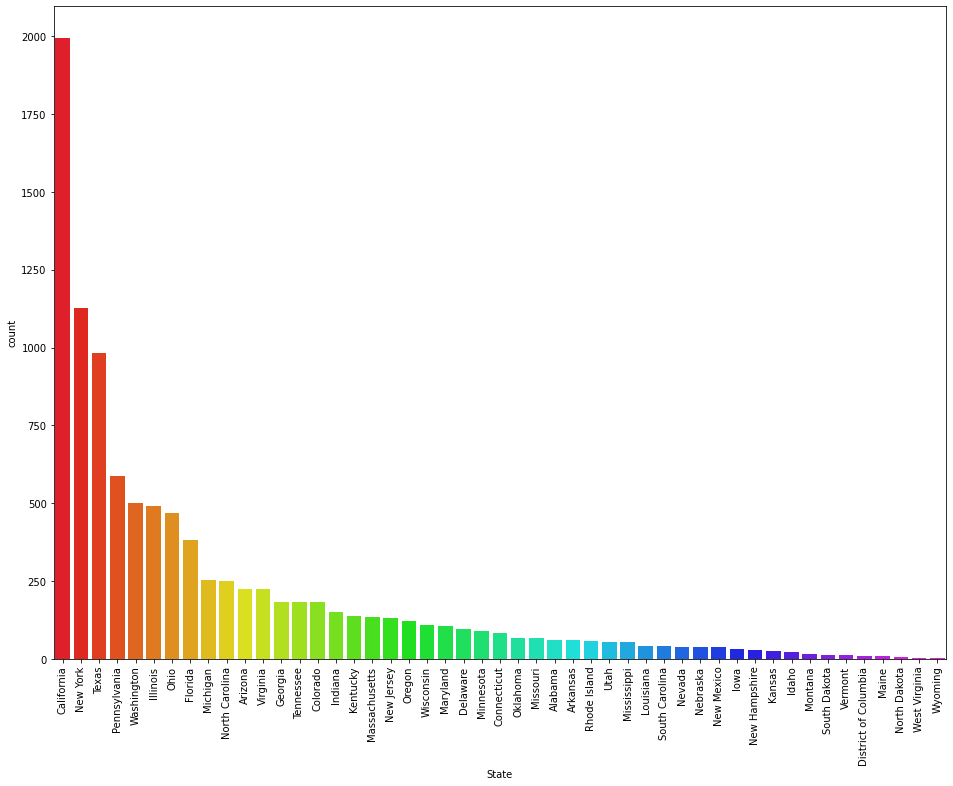

In [58]:
plt.figure(figsize=(16,12))
sns.countplot(x='State', data = data, palette= 'gist_rainbow',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

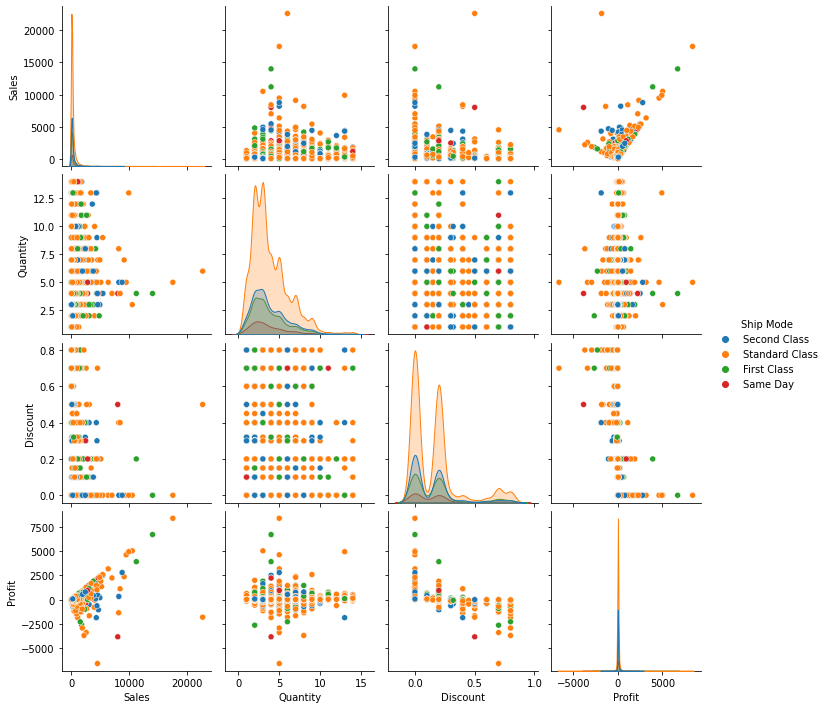

In [59]:
sns.pairplot(data, hue= 'Ship Mode')

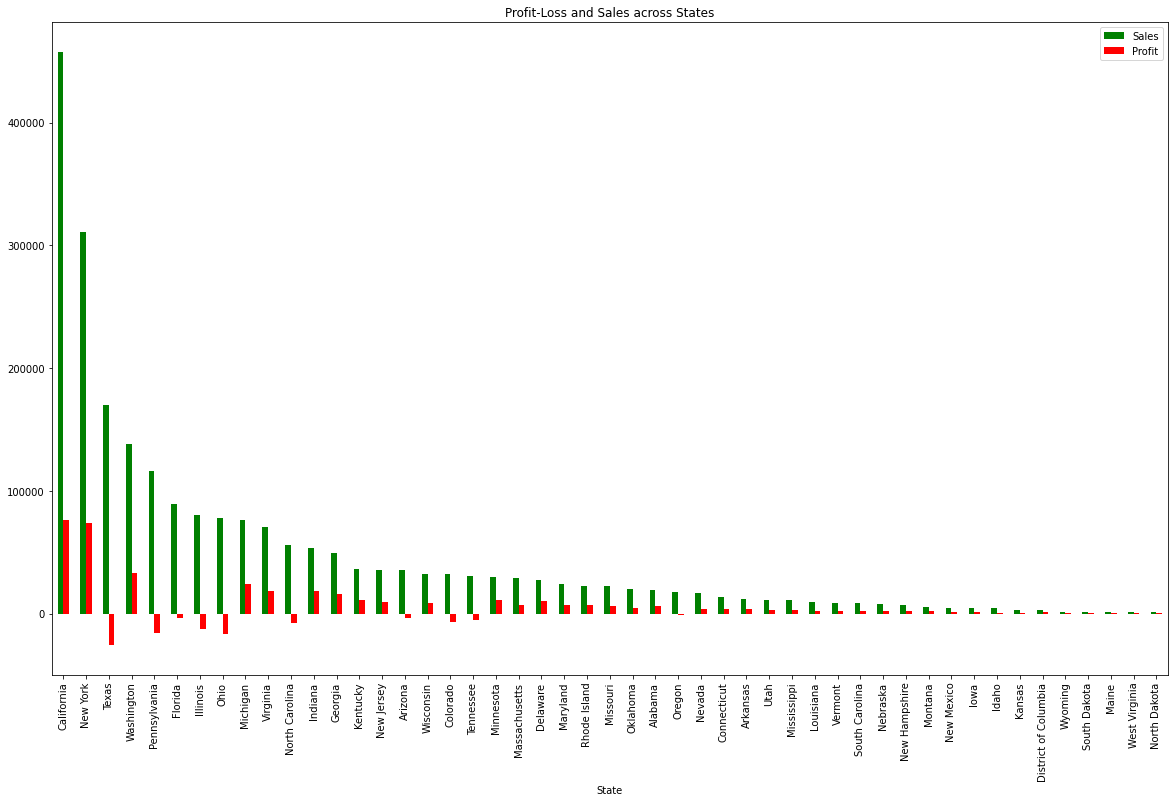

In [60]:
data1= data.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Green","Red"], figsize=(20,12))
plt.title("Profit-Loss and Sales across States")
plt.show()

### California and New York generate more profit compared to the other states.



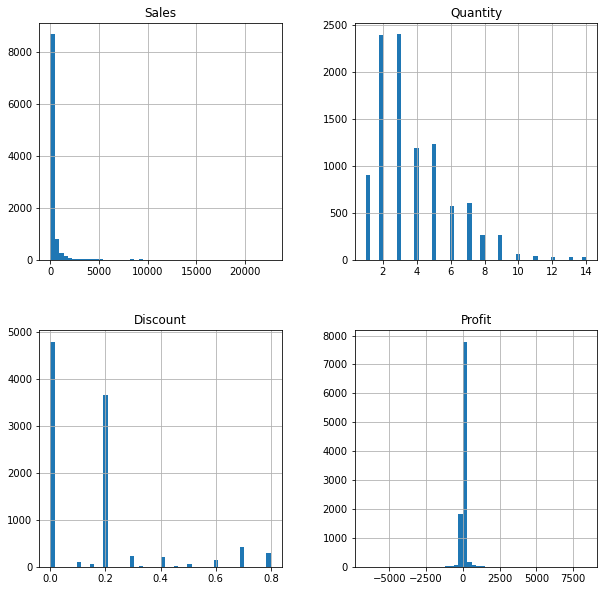

In [61]:
data.hist(figsize=(10,10), bins= 50)
plt.show()

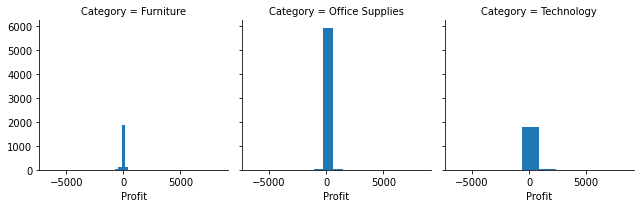

In [62]:
p = sns.FacetGrid(data, col ='Category')
p.map(plt.hist, 'Profit')

### Maximum profit is in Office supplies

<AxesSubplot:xlabel='Profit', ylabel='Count'>

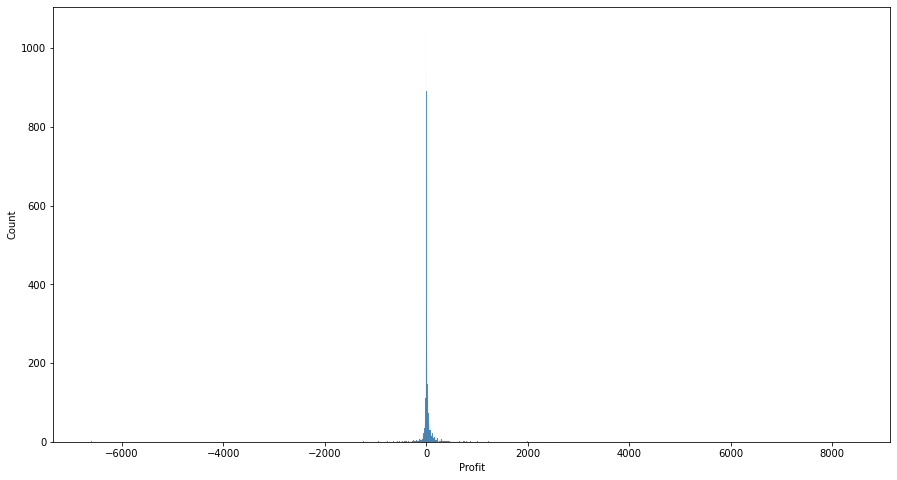

In [63]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data.Profit)

### The western region has the max sales

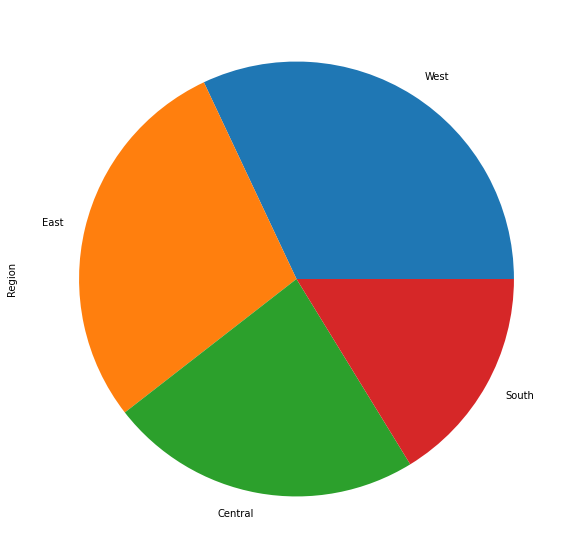

In [64]:
plt.figure(figsize=(15,10))
data['Region'].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

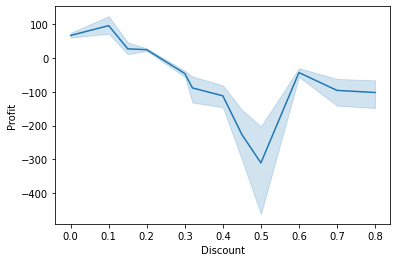

In [65]:
sns.lineplot(data=data, x="Discount", y= "Profit")

### Discount and profit are inversely proportional to each other



## Conclusion:

1. California, Washington and NewYork generates the most sales compared to the other places.
2. The Western region generates highest profit.
3. The Central region generates lowest profit.
4. Texas, Florida,Pennsylvenia, Illinois, Ohio and some other states are generating loss with high sale. Hence, we need to give focus and attention towards them.



Therefore, we have to work more on New York and California. Increase the sales in these states by reducing the sales in states like Texas, Florida, Ohio. By decreasing the discount rates in Central region we can increase the profit. Finally we should increase the sale of Office Supplies category as they contribute more.

# **Thank you.**